In [51]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [53]:
# Step 2: Load and preprocess the data
df = pd.read_csv("AirPassengers.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.columns = ['Passengers']

In [55]:
# Step 3: ADF test function
def adf_test(series, title=''):
    print(f"\nADF Test on {title}")
    result = adfuller(series.dropna())
    print(f"ADF Statistic : {result[0]}")
    print(f"p-value : {result[1]}")
    for key, value in result[4].items():
        print(f'Critical Value ({key}) : {value}')
    if result[1] < 0.05:
        print("✅ Series is stationary.")
    else:
        print("❌ Series is non-stationary.")


In [57]:
# Step 4: Run ADF test on original data
adf_test(df['Passengers'], title='Original Time Series') 


ADF Test on Original Time Series
ADF Statistic : 0.8153688792060447
p-value : 0.9918802434376409
Critical Value (1%) : -3.4816817173418295
Critical Value (5%) : -2.8840418343195267
Critical Value (10%) : -2.578770059171598
❌ Series is non-stationary.


In [59]:
# Step 5: First-order differencing
df_diff = df['Passengers'].diff()

In [61]:
# Step 6: Run ADF test on differenced data
adf_test(df_diff, title='1st Order Differenced Series')


ADF Test on 1st Order Differenced Series
ADF Statistic : -2.8292668241699794
p-value : 0.05421329028382823
Critical Value (1%) : -3.4816817173418295
Critical Value (5%) : -2.8840418343195267
Critical Value (10%) : -2.578770059171598
❌ Series is non-stationary.


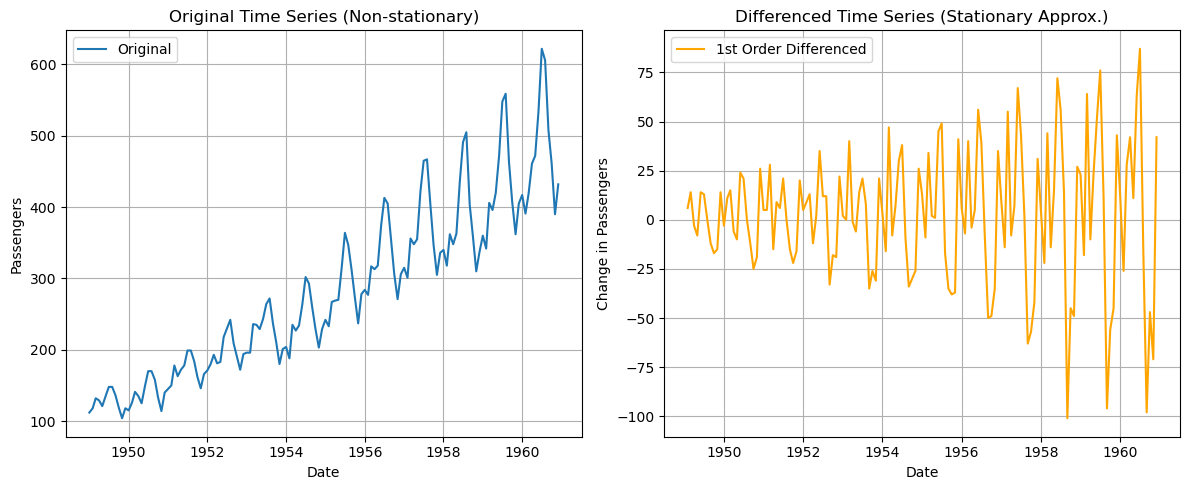

In [67]:
# Step 7: Plot both series
plt.figure(figsize=(12, 5))

# Original data
plt.subplot(1, 2, 1)
plt.plot(df['Passengers'], label='Original')
plt.title('Original Time Series (Non-stationary)')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.legend()

# Differenced data
plt.subplot(1, 2, 2)
plt.plot(df_diff, color='orange', label='1st Order Differenced')
plt.title('Differenced Time Series (Stationary Approx.)')
plt.xlabel('Date')
plt.ylabel('Change in Passengers')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [83]:
df = df.asfreq('MS')  # 'MS' = Month Start

Forecast for next month: 471


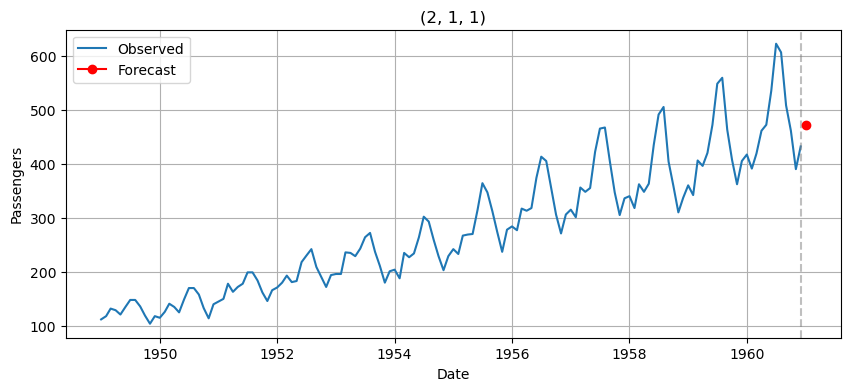

In [127]:
from statsmodels.tsa.arima.model import ARIMA

# Step 8: Fit ARIMA(2,1,2) model
model = ARIMA(df['Passengers'], order=(2, 1, 1))
model_fit = model.fit()

# Step 9: Forecast next month's passenger number
forecast = model_fit.forecast(steps=1)
print("Forecast for next month:", round(forecast.iloc[0]))

# Step 10: Plot forecast
import pandas as pd
import matplotlib.pyplot as plt

next_month = df.index[-1] + pd.DateOffset(months=1)

plt.figure(figsize=(10, 4))
plt.plot(df['Passengers'], label='Observed')
plt.axvline(x=df.index[-1], color='gray', linestyle='--', alpha=0.5)
plt.plot([next_month], [forecast.iloc[0]], marker='o', color='red', label='Forecast')
plt.title(model.order)
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()


Forecast for next month: 471


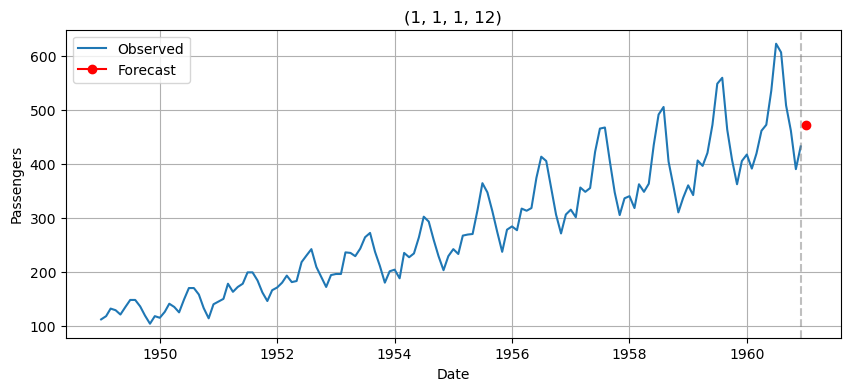

In [129]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model2 = SARIMAX(df['Passengers'], order=(1,1,1), seasonal_order=(1,1,1,12))

# Step 9: Forecast next month's passenger number
forecast = model_fit.forecast(steps=1)
print("Forecast for next month:", round(forecast.iloc[0]))

# Step 10: Plot forecast
import pandas as pd
import matplotlib.pyplot as plt

next_month = df.index[-1] + pd.DateOffset(months=1)

plt.figure(figsize=(10, 4))
plt.plot(df['Passengers'], label='Observed')
plt.axvline(x=df.index[-1], color='gray', linestyle='--', alpha=0.5)
plt.plot([next_month], [forecast.iloc[0]], marker='o', color='red', label='Forecast')
plt.title(model2.seasonal_order)
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()


In [123]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pmdarima]1/2 [pmdarima]
Note: you may need to restart the kernel to use updated packages.


In [125]:
from pmdarima import auto_arima

model = auto_arima(df['Passengers'], seasonal=True, m=12, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.84 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.08 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.33 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.13 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.33 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.04 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.07 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.27 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.26 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.51 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.02 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.02 sec
 ARIMA(3,1,1)(0,1,0

In [131]:
import pandas as pd

# Forecast next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future month labels
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')

# Combine into a readable table
forecast_table = pd.DataFrame({
    'Date': future_dates,
    'Forecasted Passengers': forecast
})
forecast_table['Month'] = forecast_table['Date'].dt.strftime('%b %Y')
forecast_table.set_index('Month', inplace=True)
forecast_table = forecast_table[['Forecasted Passengers']]

# Display the forecast table
print("📅 Forecasted Passenger Table:")
print(forecast_table.round())


📅 Forecasted Passenger Table:
          Forecasted Passengers
Month                          
Jan 1961                  471.0
Feb 1961                  493.0
Mar 1961                  498.0
Apr 1961                  493.0
May 1961                  484.0
Jun 1961                  478.0
Jul 1961                  475.0
Aug 1961                  475.0
Sep 1961                  476.0
Oct 1961                  478.0
Nov 1961                  479.0
Dec 1961                  479.0
